In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

In [2]:
images = np.load(r"C:\Users\Nathan\Documents\WGU\D604\Task 1\images.npy")
labels = pd.read_csv(r"C:\Users\Nathan\Documents\WGU\D604\Task 1\labels.csv")

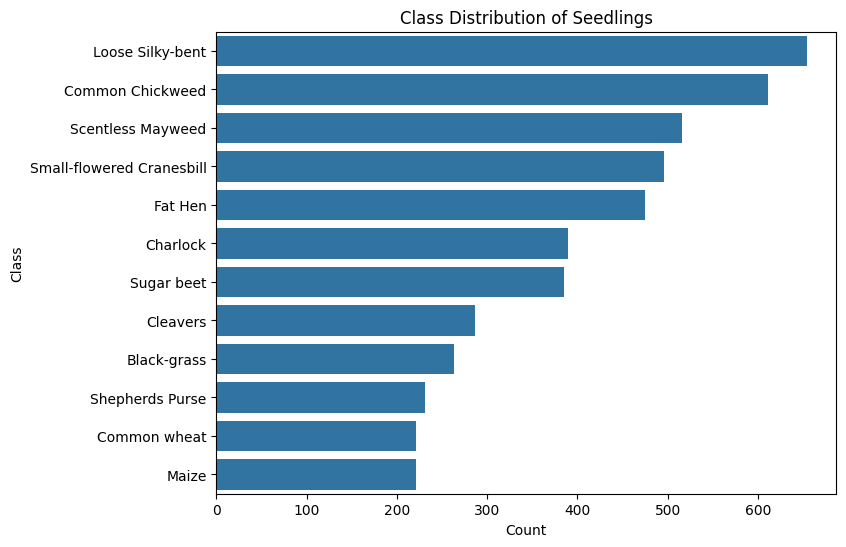

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(y=labels['Label'], order=labels['Label'].value_counts().index)
plt.title("Class Distribution of Seedlings")
plt.xlabel("Count")
plt.ylabel("Class")
plt.show()

In [4]:
num_samples = 12
indices = np.random.choice(range(images.shape[0]), num_samples, replace=False)
sample_images = images[indices]
sample_labels = labels['Label'].iloc[indices]

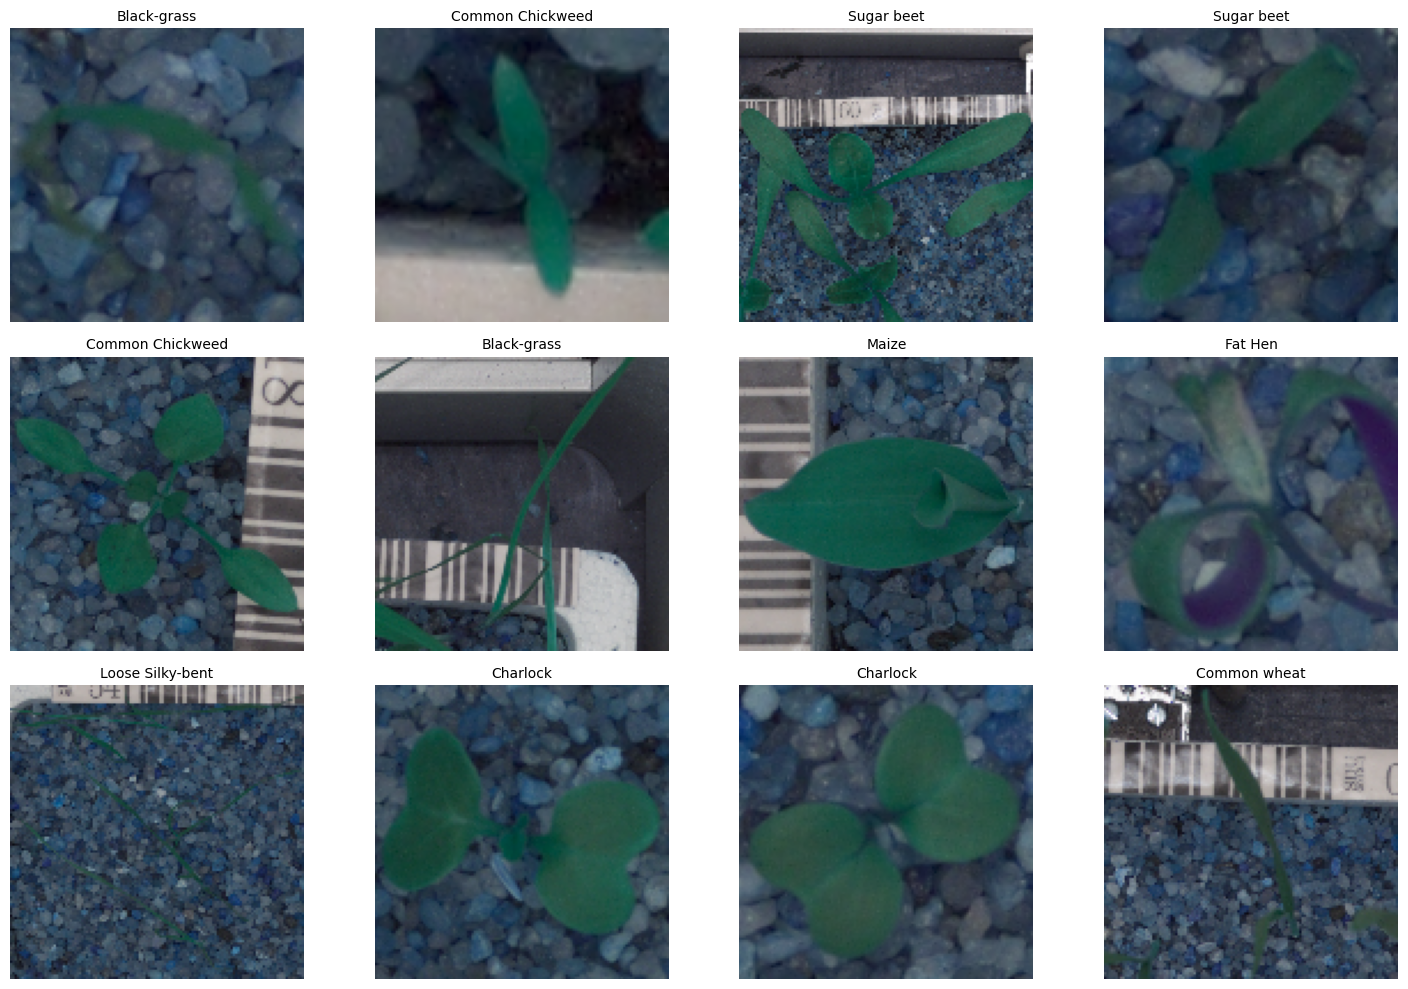

In [5]:
plt.figure(figsize=(15, 10))
for i, (img, lbl) in enumerate(zip(sample_images, sample_labels)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img.astype('uint8'))
    plt.title(lbl, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
datagen = ImageDataGenerator(            
    rotation_range=15,          
    width_shift_range=0.1,      
    height_shift_range=0.1,     
    zoom_range=0.1,            
    horizontal_flip=True,       
    brightness_range=[0.8, 1.2])

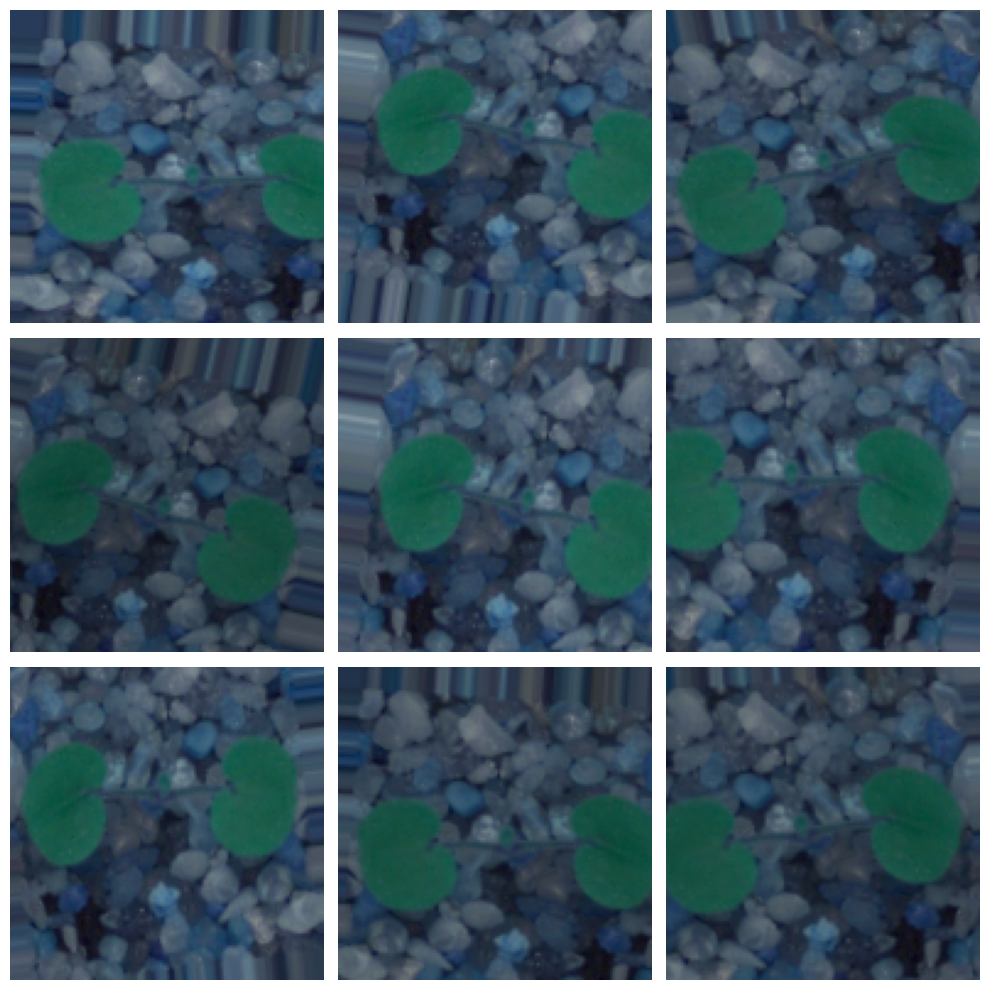

In [7]:
sample_image = images[0].astype('uint8')
sample_image = np.expand_dims(sample_image, axis=0)

plt.figure(figsize=(10, 10))
for i, augmented in enumerate(datagen.flow(sample_image, batch_size=1)):
    if i == 9:
        break
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented[0].astype('uint8'))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
images = images / 255.0

In [9]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels['Label'])

In [10]:
X_train, X_train_val, y_train, y_train_val = train_test_split(images, labels_encoded, test_size=0.3, random_state=42, stratify=labels_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42, stratify=y_train_val)

In [11]:
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (3325, 128, 128, 3) (3325,)
Validation: (712, 128, 128, 3) (712,)
Test: (713, 128, 128, 3) (713,)


In [12]:
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

In [13]:
np.save("X_train.npy", X_train)
np.save("X_val.npy", X_val)
np.save("X_test.npy", X_test)

np.save("y_train.npy", y_train_encoded)
np.save("y_val.npy", y_val_encoded)
np.save("y_test.npy", y_test_encoded)

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\Nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,706,636 (14.14 MB)

 Trainable params: 3,706,636 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels_encoded),
    y=labels_encoded
)
class_weights_dict = dict(enumerate(class_weights))

history = model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded),
                    epochs=50, batch_size=32, callbacks=[early_stopping],
                    class_weight=class_weights_dict)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 22s 205ms/step - accuracy: 0.1254 - loss: 2.4609 - val_accuracy: 0.4298 - val_loss: 2.1647
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 202ms/step - accuracy: 0.2346 - loss: 2.1227 - val_accuracy: 0.4747 - val_loss: 1.6795
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.3167 - loss: 1.8905 - val_accuracy: 0.5225 - val_loss: 1.5100
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 22s 206ms/step - accuracy: 0.3441 - loss: 1.7625 - val_accuracy: 0.5548 - val_loss: 1.3633
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 43s 222ms/step - accuracy: 0.3880 - loss: 1.6275 - val_accuracy: 0.6264 - val_loss: 1.2738
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 40s 209ms/step - accuracy: 0.4105 - loss: 1.6104 - val_accuracy: 0.5379 - val_loss: 1.2771
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 202ms/step - accuracy: 0.4114 - loss: 1.5623 - val_accuracy: 0.5632 - val_loss: 1.2373
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.4352 - loss: 1

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_acc}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6690 - loss: 1.0470
Test Accuracy: 0.6690042018890381


In [17]:
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

cm

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step 


array([[18,  0,  0,  0,  4,  2, 15,  0,  0,  0,  0,  0],
       [ 0, 50,  2,  0,  0,  0,  0,  1,  0,  1,  1,  3],
       [ 0,  2, 30,  0,  2,  0,  0,  0,  6,  2,  0,  1],
       [ 0,  0,  0, 82,  1,  2,  0,  0,  4,  2,  0,  1],
       [ 7,  0,  2,  0, 16,  5,  3,  0,  0,  0,  0,  0],
       [ 1,  3,  2,  2,  5, 38, 18,  0,  1,  0,  2,  0],
       [13,  0,  0,  0,  8,  5, 72,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  2,  1, 17,  2,  4,  1,  3],
       [ 0,  1,  2,  2,  7, 11,  0,  4, 46,  4,  0,  1],
       [ 0,  0,  1,  0,  0,  2,  0,  3,  6, 14,  8,  0],
       [ 0,  0,  1,  2,  0,  5,  1,  0,  0,  4, 61,  1],
       [ 1,  0,  1,  1,  3, 13,  0,  0,  2,  1,  3, 33]])

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


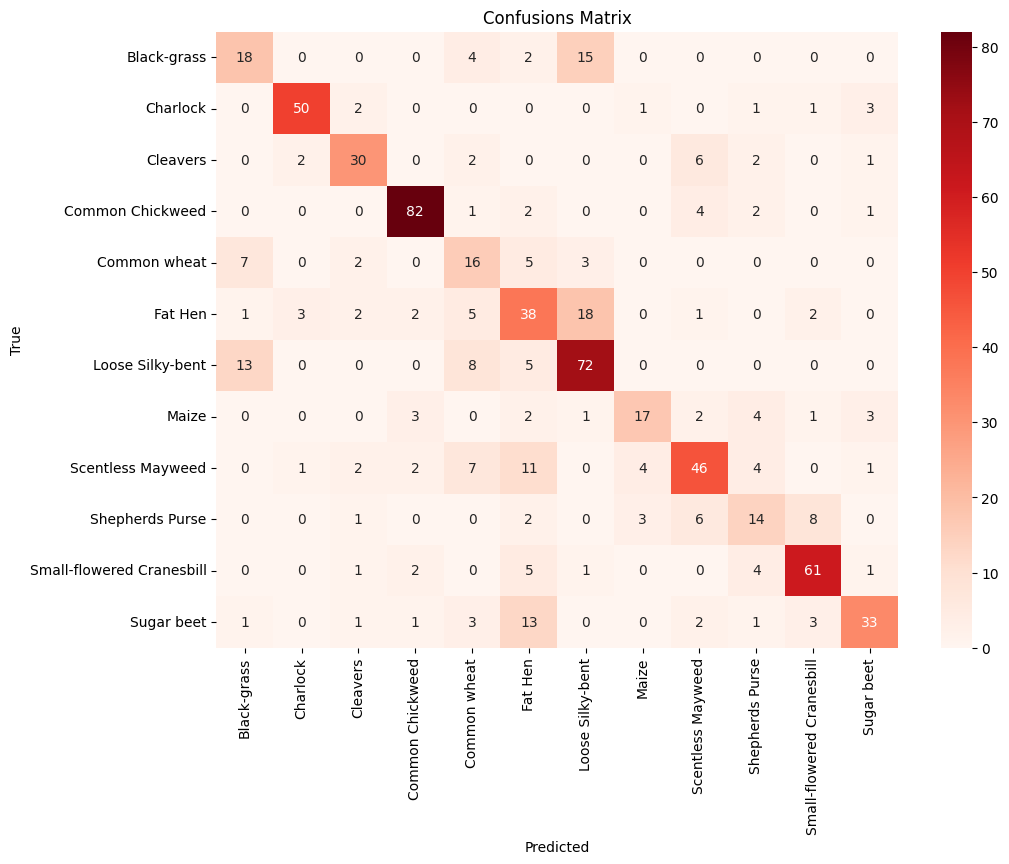

In [18]:
cm =confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=1))
plt.figure(figsize=(11,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusions Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

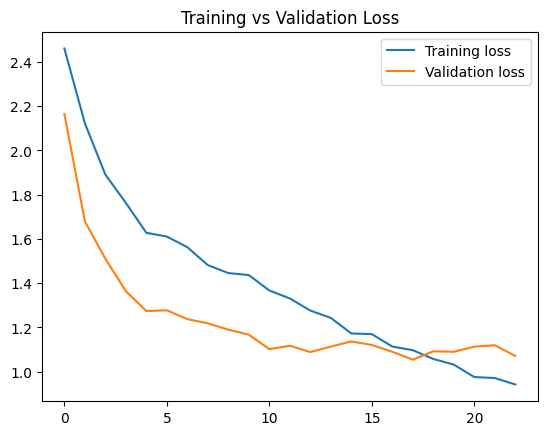

In [19]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [23]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

y_train_classes = np.argmax(y_train, axis=1) if y_train.ndim > 1 else y_train
y_val_classes = np.argmax(y_val, axis=1) if y_val.ndim > 1 else y_val

f1_train = f1_score(y_train_classes, y_train_pred_classes, average='macro')
f1_val = f1_score(y_val_classes, y_val_pred_classes, average='macro')

print(f"F1-score (Train): {f1_train:.4f}")
print(f"F1-score (Validation): {f1_val:.4f}")

104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
F1-score (Train): 0.8840
F1-score (Validation): 0.6549
